### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# output folder to read from
folder = 'outputs 2024-05-03 baseline'

In [4]:
# scenario to plot
# comment/uncomment to run each scenario
scenario = 'delivery only'
# scenario = 'closed loop'

In [5]:
# location name mapping
location_map = {
    'liquefier' : 'terminal',
    'truck' : 'transport',
    'refueling station' : 'station',
}

# function name mapping
function_map = {
    'vaporization' : 'other',
    'cooling' : 'other',
    'purchase' : 'H2 production',
    'trucking' : 'H2/LOHC trucking',
    }

# pathway name mapping
pathway_map = {
    'compressed hydrogen' : 'Compr. ${H_2}$',
    'liquid hydrogen' : 'Liq. ${H_2}$',
    'LOHC - formic acid' : 'Formic acid',
    }

In [6]:
# custom categories for sorting results
# = category order for plots

# delivery pathways
pathway_categories = [
    'compressed hydrogen', 
    'liquid hydrogen', 
    'LOHC - formic acid'
    ]

# locations
location_categories = [
    'terminal',
    'transport',
    'station'
]

# functions (transformations)
# delivery-only scenario
function_categories_1w = [
    'liquefaction',
    'compression',
    'pumping',
    'storage',
    'H2/LOHC trucking',
    'reaction',
    'separation',
    'other'
    ]

# functions (transformations)
# closed-loop scenario
function_categories_2w = [
    'H2 production',
    'CO2 recycling',
    ] + function_categories_1w

In [7]:
# subplot titles
subplot_titles = [
    'Compressed hydrogen', 
    'Liquid hydrogen', 
    'Formic acid LOHC',
    'Total system cost, all pathways',
]

In [8]:
# bar colors
# seaborn colorblind palette
# https://seaborn.pydata.org/tutorial/color_palettes.html
colors = sns.color_palette('colorblind')

# use grey for "other"
bar_colors = colors[:-3] + colors [-2:] + [colors[-3]]

In [9]:
# number of pathways
num_paths = len(pathway_categories)

In [10]:
# function categories to use for selected scenario

function_categories = function_categories_2w

if scenario == 'delivery only':
    function_categories = function_categories_1w

### READ INPUT PARAMETERS

In [11]:
# read input parameter map
df_input_params = pd.read_csv(
    os.path.join('..\outputs', folder, 'input params.csv')
    )

# extract output dollar year
output_dollar_year = df_input_params['output dollar year'].values[0]

# extract run number
run_num = df_input_params.loc[
    df_input_params['scenario'] == scenario, 'run #'].values[0]

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15660\2784994732.py:3: SyntaxWarning: invalid escape sequence '\o'
  os.path.join('..\outputs', folder, 'input params.csv')


### DATA PROCESSING

In [12]:
# read csv
f = 'output_' + str(run_num).zfill(4) + '.csv'
df = pd.read_csv(os.path.join('..\outputs', folder, f))

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15660\3339346792.py:3: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv(os.path.join('..\outputs', folder, f))


In [13]:
# filter results by units
df_usd_per_kg = df.loc[df['unit'] == '$/kg H2'].reset_index(drop = True)

# convert "value" columns to float
df_usd_per_kg['value'] = df_usd_per_kg['value'].astype(float)

# remap locations and functions
df_usd_per_kg['location'].replace(location_map, inplace = True)
df_usd_per_kg['function'].replace(function_map, inplace = True)

df_usd_per_kg

C:\Users\yuan13\AppData\Local\Temp\ipykernel_15660\2906715972.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_usd_per_kg['location'].replace(location_map, inplace = True)
C:\Users\yuan13\AppData\Local\Temp\ipykernel_15660\2906715972.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,pathway,process,location,function,equipment,variable group,variable name,unit,value
0,compressed hydrogen,production,terminal,H2 production,hydrogen purchase,O&M cost,purchase cost,$/kg H2,0.000000
1,compressed hydrogen,preconditioning,terminal,compression,loading compressor,capital cost,levelized capital cost,$/kg H2,0.536905
2,compressed hydrogen,preconditioning,terminal,compression,storage compressor,capital cost,levelized capital cost,$/kg H2,0.475392
3,compressed hydrogen,preconditioning,terminal,storage,compressed gas storage,capital cost,levelized capital cost,$/kg H2,0.486149
4,compressed hydrogen,preconditioning,terminal,compression,loading compressor,O&M cost,"operation, maintenance, repair costs",$/kg H2,0.099001
...,...,...,...,...,...,...,...,...,...
147,LOHC - formic acid,reconditioning,station,pumping,reactor pump,energy cost,electricity cost,$/kg H2,0.000000
148,LOHC - formic acid,reconditioning,station,other,PSA refrigerator,energy cost,electricity cost,$/kg H2,0.001384
149,LOHC - formic acid,reconditioning,station,separation,PSA,energy cost,electricity cost,$/kg H2,1.019590
150,LOHC - formic acid,reconditioning,station,compression,compressor,energy cost,electricity cost,$/kg H2,0.425336


In [14]:
# cost breakdown by pathway, location, and function

# regroup results by pathway, location, remapped function
df_func = df_usd_per_kg.groupby(
    by = ['pathway', 'location', 'function']
    )['value'].sum().reset_index()

# pivot dataframe
df_func_pivot = \
    df_func.pivot(
        columns = 'function',
        index = ['pathway', 'location'],
        values = 'value',
        ).fillna(0).reset_index()

# drop columns that are all zero
df_func_pivot = df_func_pivot.loc[
    :, (df_func_pivot != 0).any(axis = 0)
    ].reset_index(drop = True)
    
# sort results by custom categories
df_func_pivot['location'] = pd.Categorical(
    df_func_pivot['location'], 
    categories = location_categories
    )

df_func_pivot = \
    df_func_pivot.sort_values(
        by = ['location']
        )

# capitalize location and function names
# use as axis labels
df_func_pivot['location'] = df_func_pivot['location'].str.capitalize()

df_func_pivot

function,pathway,location,H2/LOHC trucking,compression,liquefaction,other,pumping,reaction,separation,storage
1,LOHC - formic acid,Terminal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163416
4,compressed hydrogen,Terminal,0.000000,1.837601,0.000000,0.000000,0.000000,0.000000,0.000000,0.643369
7,liquid hydrogen,Terminal,0.000000,0.000000,4.435231,0.000000,0.022451,0.000000,0.000000,0.330505
2,LOHC - formic acid,Transport,0.994497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,compressed hydrogen,Transport,0.877489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,liquid hydrogen,Transport,0.309408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,LOHC - formic acid,Station,0.000000,2.604754,0.000000,0.184068,0.000000,0.170203,2.672809,0.455625
3,compressed hydrogen,Station,0.000000,1.868844,0.000000,0.179694,0.000000,0.000000,0.000000,0.454956
6,liquid hydrogen,Station,0.000000,0.000000,0.000000,0.045560,1.220412,0.000000,0.000000,0.600254


In [15]:
# calculate y-axis limit for total cost breakdown
ymax = np.ceil(
    df_func_pivot[
        function_categories].sum(axis = 'columns').max()
)

ymax

7.0

In [16]:
# total cost breakdown by pathway and function for all pathways

# regroup results by pathway and remapped function
df_tot_func = df_usd_per_kg.groupby(
    by = ['pathway', 'function']
    )['value'].sum().reset_index()

# pivot dataframe
df_tot_func_pivot = \
    df_tot_func.pivot(
        columns = 'function',
        index = ['pathway'],
        values = 'value',
        ).fillna(0).reset_index()

# drop columns that are all zero
df_tot_func_pivot = df_tot_func_pivot.loc[
    :, (df_tot_func_pivot != 0).any(axis = 0)
    ].reset_index(drop = True)

# sort results by custom categories
df_tot_func_pivot['pathway'] = pd.Categorical(
    df_tot_func_pivot['pathway'], 
    categories = pathway_categories
    )

df_tot_func_pivot = \
    df_tot_func_pivot.sort_values(
        by = ['pathway']
        )

# rename pathways
# use as axis labels
df_tot_func_pivot.replace(pathway_map, inplace = True)

df_tot_func_pivot

C:\Users\yuan13\AppData\Local\Temp\ipykernel_15660\718257677.py:34: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_tot_func_pivot.replace(pathway_map, inplace = True)


function,pathway,H2/LOHC trucking,compression,liquefaction,other,pumping,reaction,separation,storage
1,Compr. ${H_2}$,0.877489,3.706445,0.000000,0.179694,0.000000,0.000000,0.000000,1.098326
2,Liq. ${H_2}$,0.309408,0.000000,4.435231,0.045560,1.242863,0.000000,0.000000,0.930759
0,Formic acid,0.994497,2.604754,0.000000,0.184068,0.000000,0.170203,2.672809,0.619041


In [17]:
# calculate y-axis limit for total cost breakdown
ymax_tot = np.ceil(
    df_tot_func_pivot[
        function_categories].sum(axis = 'columns').max()
)

ymax_tot

8.0

### PLOT: hydrogen cost breakdown

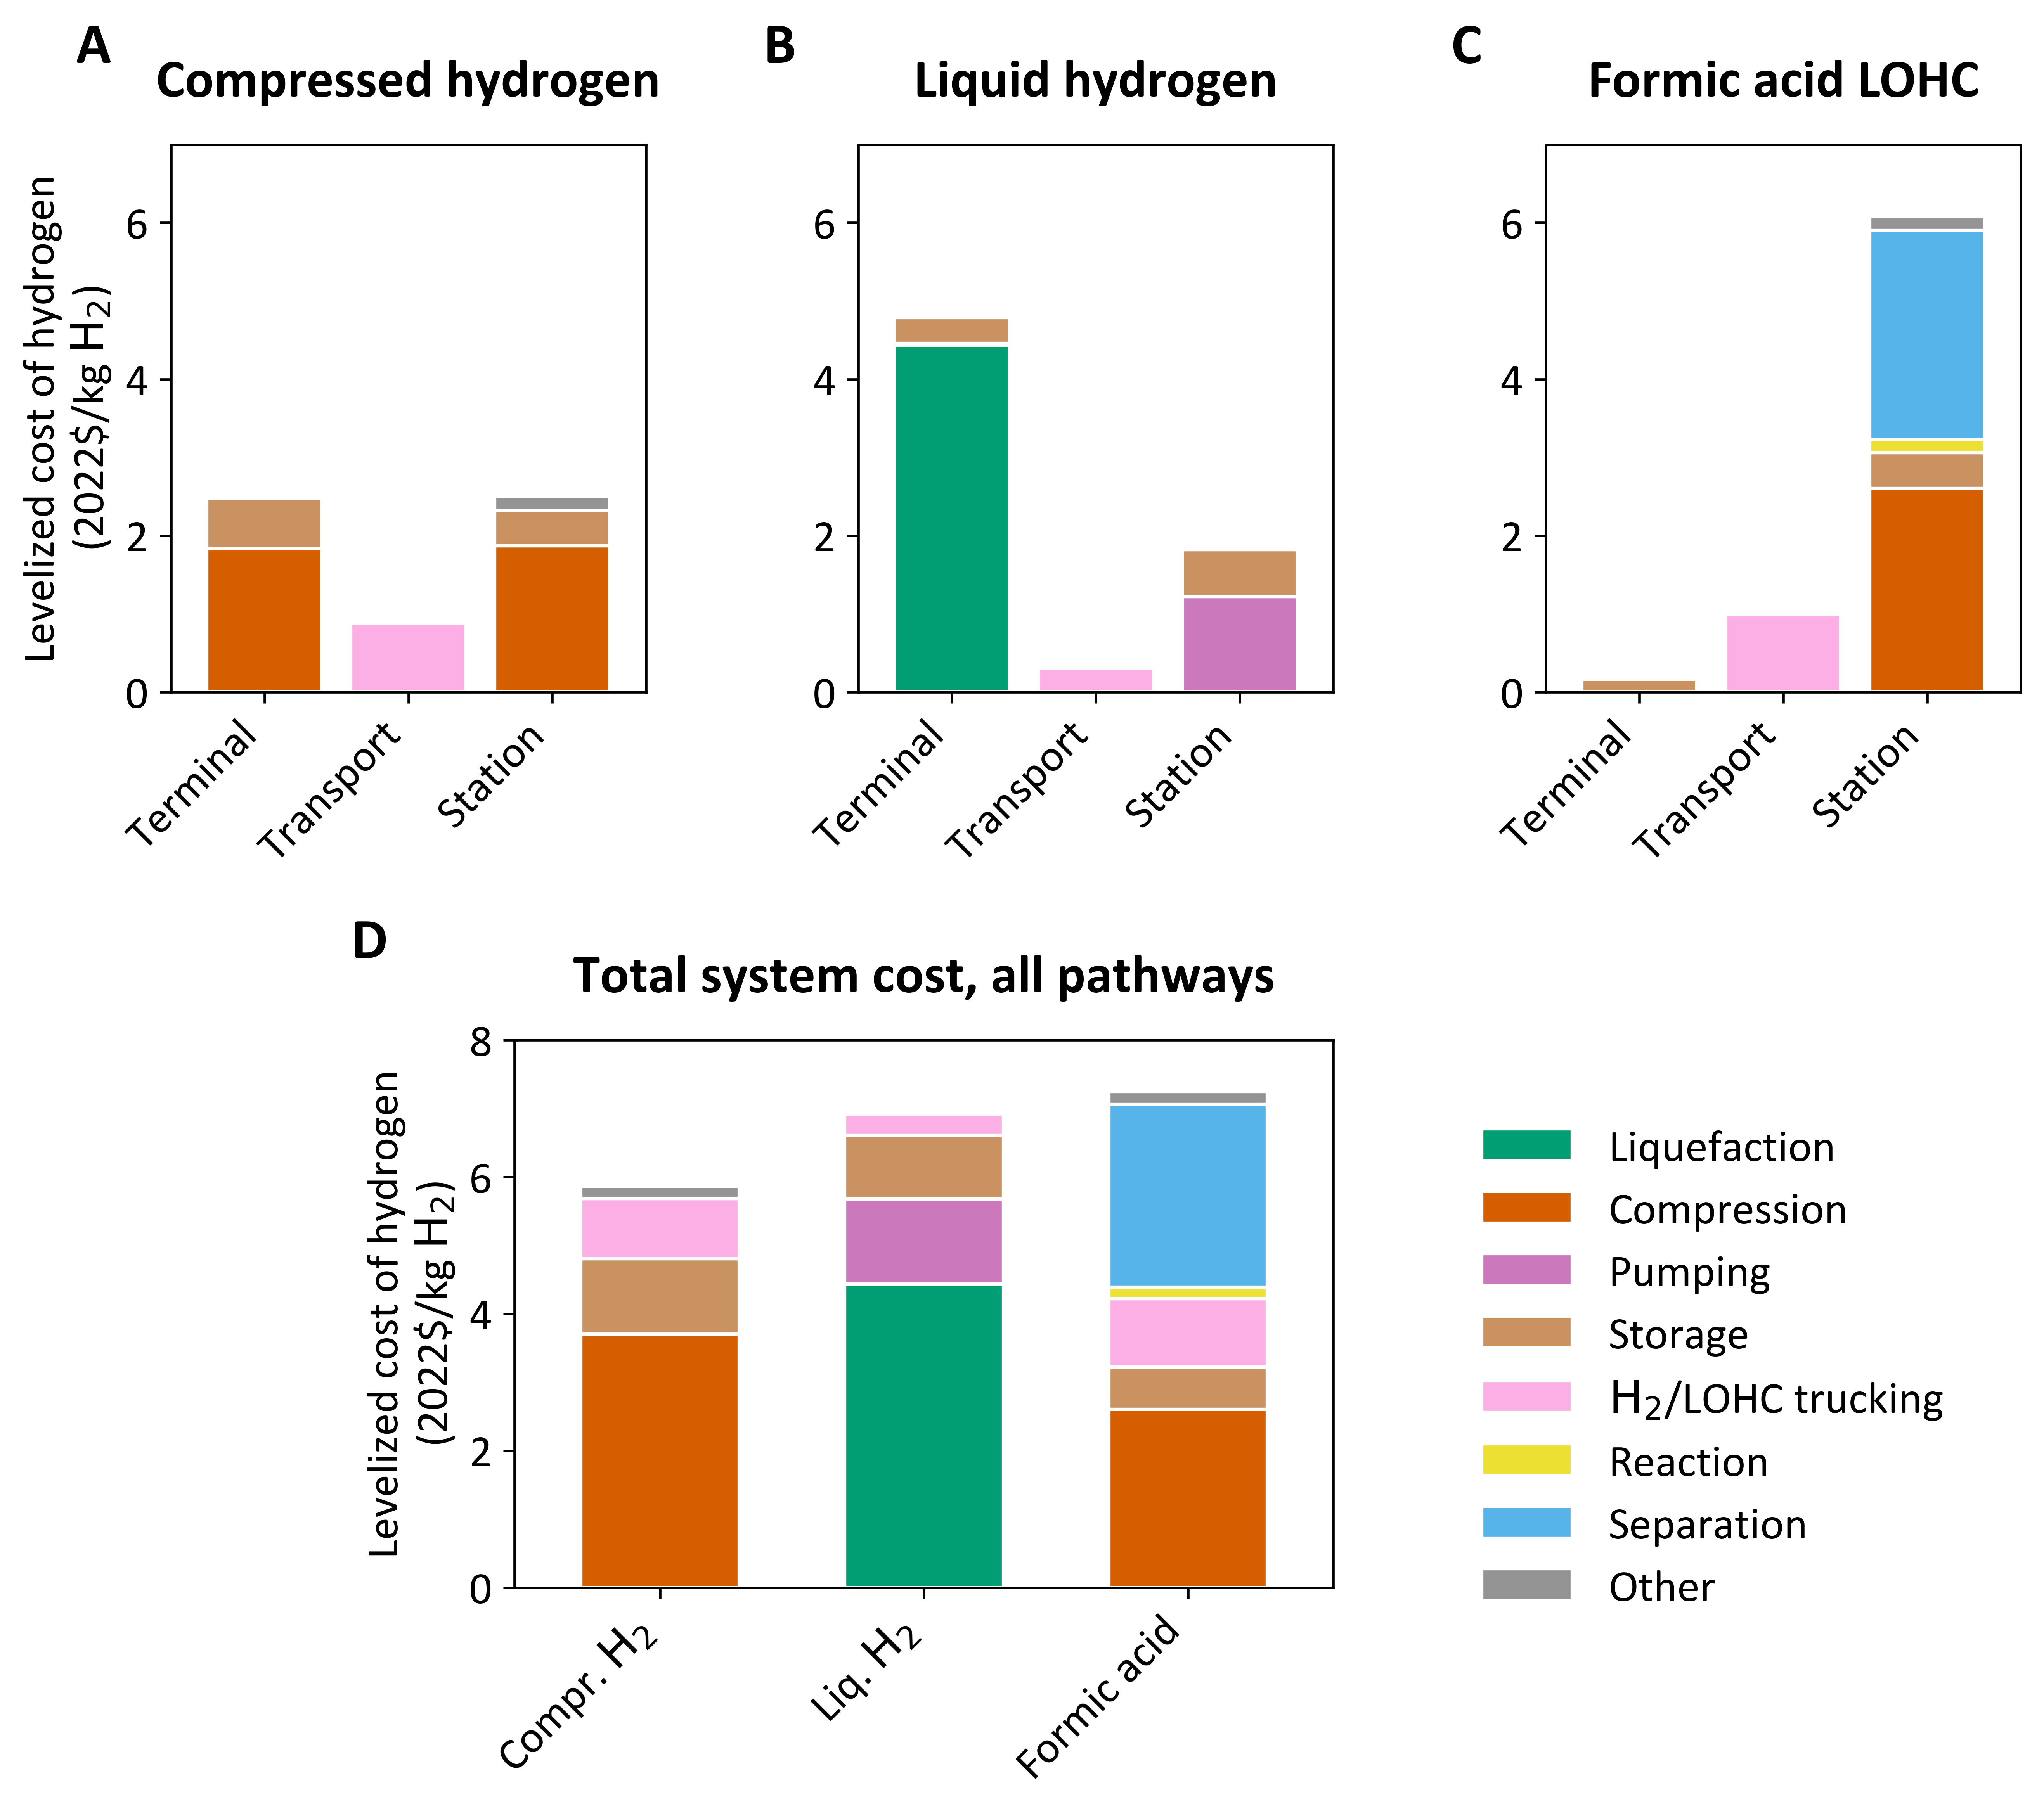

In [18]:
# create subplots
fig = plt.figure(
    layout = 'tight',
    figsize = (9, 8),
    dpi = 600
)

gs = GridSpec(2, 2 * num_paths, figure = fig)

axes = []
for p in range(num_paths):
    axes.append(
        fig.add_subplot(gs[0:1, (0+2*p):(2+2*p)])
    )
axes.append(fig.add_subplot(gs[1:2, 1:4]))

# fill subplots
for p in range(num_paths):

    # filter results for each pathway
    df_func_p = df_func_pivot.loc[
        df_func_pivot['pathway'] == pathway_categories[p]
        ].reset_index(drop = True)
    
    # plot results for each pathway
    df_func_p.plot.bar(
        ax = axes[p],
        x = 'location',
        y = function_categories,
        ylim = (0, ymax),
        stacked = True,
        width = 0.8,
        color = bar_colors[-len(function_categories):],
        edgecolor = 'white',
    )
        
# plot total cost breakdown for all pathways
df_tot_func_pivot.plot.bar(
    ax = axes[-1],
    x = 'pathway',
    y = function_categories,
    ylim = (0, ymax_tot),
    stacked = True,
    width = 0.6,
    color = bar_colors[-len(function_categories):],
    edgecolor = 'white',
)

# update subplot titles and numbering
text = ['A', 'B' , 'C', 'D']

for i in range(len(axes)):
    axes[i].set_title(
        subplot_titles[i],
        fontweight = 'bold',
        pad = 15
    )

    axes[i].annotate(
        text[i], 
        xy=(-0.2, 1.15), 
        xycoords = 'axes fraction', 
        annotation_clip=False,
        fontsize = 18,
        fontweight = 'bold'
    )
    
# remove legend and x-axis label from subplot
for ax in axes:
    ax.get_legend().remove()
    ax.set_xlabel('')

# update axis settings
for ax in axes:
    ax.set_xticks(
        ax.get_xticks(), 
        ax.get_xticklabels(), 
        rotation = 45,
        ha = 'right',
    )

for i in [0, -1]:
    axes[i].set_ylabel(
        'Levelized cost of hydrogen\n' + \
        '({}\\$/kg'.format(output_dollar_year) + ' ${H_2}$)')

# add legend for figure
handles, labels = axes[-1].get_legend_handles_labels()

labels_new = []
for label in labels:
    label = label.replace('H2', '${H_2}$')
    label = label.replace('CO2', '${CO_2}$')
    if any(s in label.split()[0] for s in ['${H_2}$', '${CO_2}$', 'LOHC']):
        labels_new.append(label)
    else:
        labels_new.append(label.capitalize())

fig.legend(
    handles = handles, 
    labels = labels_new, 
    frameon = False, 
    bbox_to_anchor = (0.7, 0.1), 
    loc = 'lower left'
    )

# save plot
plt.savefig(
    'cost breakdown_' + scenario + '.png',
    bbox_inches = 'tight'
    )
    
# show plot
plt.show()